In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from Dataframe2AnalisiGrafica import dataframe2analisiGrafica
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t

In [29]:
data = pd.read_csv("./files/mushrooms.csv")
data.dropna(inplace=True)
col=data.columns
col

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [30]:
data_numerico = data
for c in col:
    numerico = LabelEncoder().fit_transform(data[c].values)
    data_numerico[c] = numerico
data_numerico

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [36]:
data_corretto = data[col[1:]]
data_corretto["class"]=data["class"]
data_corretto

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,5,2,4,1,6,1,0,1,4,0,...,7,7,0,2,1,4,2,3,5,1
1,5,2,9,1,0,1,0,0,4,0,...,7,7,0,2,1,4,3,2,1,0
2,0,2,8,1,3,1,0,0,5,0,...,7,7,0,2,1,4,3,2,3,0
3,5,3,8,1,6,1,0,1,5,0,...,7,7,0,2,1,4,2,3,5,1
4,5,2,3,0,5,1,1,0,4,1,...,7,7,0,2,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,0,5,0,0,0,11,0,...,5,5,0,1,1,4,0,1,2,0
8120,5,2,4,0,5,0,0,0,11,0,...,5,5,0,0,1,4,0,4,2,0
8121,2,2,4,0,5,0,0,0,5,0,...,5,5,0,1,1,4,0,1,2,0
8122,3,3,4,0,8,1,0,1,0,1,...,7,7,0,2,1,0,7,4,2,1


Trova class da:
-cap-shape
-cap-surface
-cap-color
-bruises
-odor
-gill-attachment
-gill-spacing
-gill-size
-gill-color
-stalk-shape
-stalk-root
-stalk-surface-above-ring
-stalk-surface-below-ring
-stalk-color-above-ring
-stalk-color-below-ring
-veil-type
-veil-color
-ring-number
-ring-type
-spore-print-color
-population
-habitat


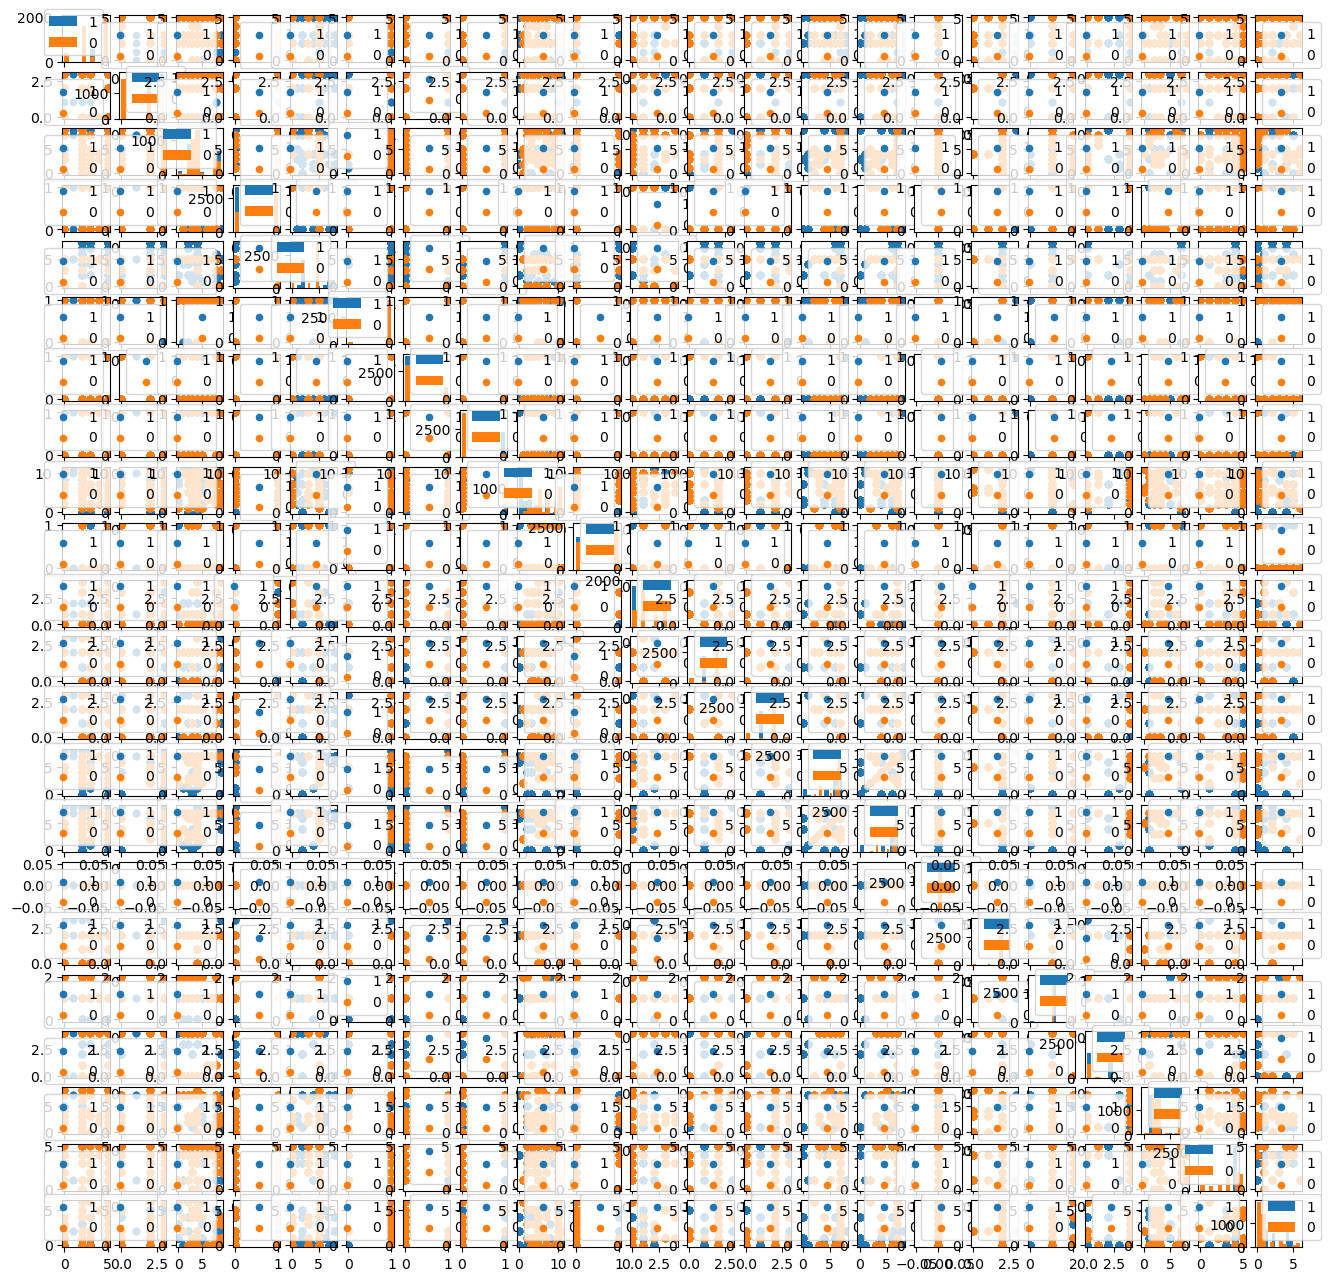

In [37]:
dataframe2analisiGrafica(data_corretto)

In [141]:
X = data_corretto[['odor','stalk-color-above-ring','habitat','bruises','spore-print-color']]
y = data_corretto[['class']]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

In [142]:
X_train_norm = ((X_train - X_train.mean())/X_train.std())
X_test_norm = ((X_test - X_test.mean())/X_test.std())

In [148]:
model = MLPClassifier(hidden_layer_sizes=(10, 10),
                       random_state=1, max_iter=150)
model.fit(X_train_norm, y_train)

print(f'''
Accuratezza Train: {model.score(X_train_norm, y_train)}
Accuratezza Test: {model.score(X_test_norm, y_test)}
''')

C:\Users\utente\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuratezza Train: 1.0
Accuratezza Test: 1.0



Trova class da:
-odor
-stalk-color-above-ring
-habitat
-bruises
-spore-print-color


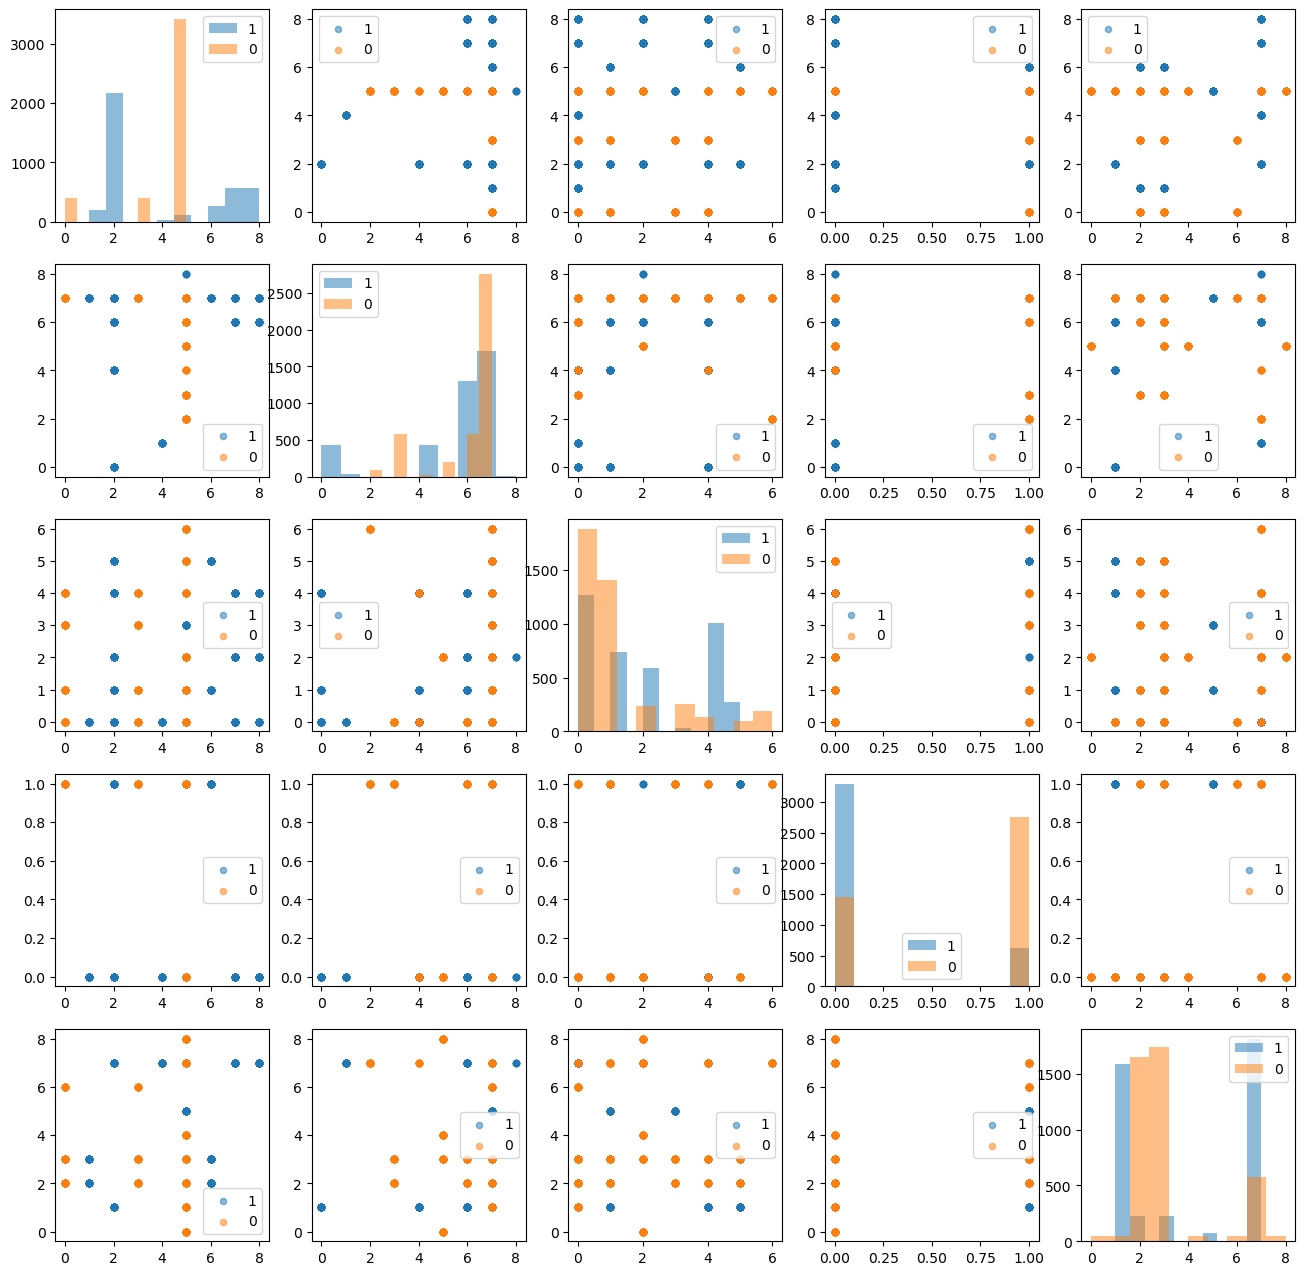

In [149]:
grafico_pezzi = X.copy()
grafico_pezzi['class']=data['class'].copy()
dataframe2analisiGrafica(grafico_pezzi, alpha=0.5)